# Info
: 기사에 사용된 단어들을 이용해 단어들의 경향성을 찾아내기 위한 코드1

In [14]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2006.01.01. 오후 11:23,매일경제,취득세ㆍ등록세 0.5%P씩 인하,0,"[취득세, 인하]"
1,2006.01.01. 오후 11:23,매일경제,양도세 부담 덜자 하반기 매물 늘듯,0,"[양도세, 부담, 하반기, 매물]"
2,2006.01.01. 오후 11:23,매일경제,서울 대치동 57평형 보유세 651만원,0,"[서울, 대치동, 평, 보유, 세, 만, 원]"
3,2006.01.01. 오후 11:23,매일경제,양도세 줄이는 방법 필요경비 증빙서류 꼭 챙기자,0,"[양도세, 방법, 필요, 경비, 증빙, 서류]"
4,2006.01.01. 오후 11:23,매일경제,올해 실거래가 신고제 폭풍 이중계약서 관행 사라진다,0,"[올해, 실, 거래, 신고, 폭풍, 이중, 계약서, 관행]"
...,...,...,...,...,...
1065646,2021.06.26. 오전 5:00,뉴시스,비상 걸린 전세⑥전문가들 꼬일 대로 꼬였다…규제라도 풀어야,807,"[비상, 전세, 전문가, 대로, 규제]"
1065647,2021.06.26. 오전 3:04,세계일보,‘래미안 원베일리’ 청약에 만점 통장 등장… 올해 두 번째,807,"[래미안, 원, 베일리, 청약, 만점, 통장, 등장, 올해, 번]"
1065648,2021.06.26. 오전 3:01,동아일보,‘10억 로또 청약’ 원베일리… 7인 가족 만점통장 나왔다,807,"[억, 로또, 청약, 원, 베일리, 인, 가족, 만점, 통장]"
1065649,2021.06.26. 오전 3:01,동아일보,故 이건희 회장 이태원 주택 210억에 매물로,807,"[이건희, 회장, 이태원, 주택, 억, 매물]"


In [15]:
weekly_keyword = keyword.groupby(['week']).sum()

In [16]:
weekly_keyword = weekly_keyword.iloc[:,3]

In [17]:
weekly_dic_all = {}
for idx in weekly_keyword.index:
    dic = {}
    for keyword in weekly_keyword[idx]:
        if keyword not in dic.keys():
            dic[keyword] = 1
        else:
            dic[keyword] += 1
    weekly_dic_all[idx] = dic

In [18]:
weekly_df_all = pd.DataFrame(weekly_dic_all)
weekly_df_all

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
취득세,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,1.0,5.0,NaN,NaN,3.0,2.0,2.0,NaN,11.0,1.0
인하,1.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,3.0,...,3.0,7.0,1.0,2.0,4.0,6.0,4.0,NaN,1.0,NaN
양도세,11.0,4.0,5.0,10.0,3.0,2.0,2.0,NaN,6.0,2.0,...,8.0,5.0,7.0,18.0,16.0,20.0,89.0,9.0,18.0,8.0
부담,2.0,1.0,3.0,1.0,7.0,1.0,NaN,2.0,3.0,1.0,...,10.0,16.0,24.0,8.0,4.0,12.0,10.0,5.0,8.0,5.0
하반기,2.0,NaN,1.0,1.0,1.0,1.0,9.0,6.0,NaN,NaN,...,1.0,10.0,6.0,5.0,2.0,9.0,9.0,7.0,30.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
수파,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
열독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
팔곡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
서선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [19]:
weekly_df_all = weekly_df_all.transpose()
weekly_df_all

,취득세,인하,양도세,부담,하반기,매물,서울,대치동,평,보유,...,몬테로,요청서,피플스,트레아,뷰스타,수파,열독,팔곡,서선,길드
0,1.0,1.0,11.0,2.0,2.0,13.0,38.0,1.0,17.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,4.0,1.0,NaN,10.0,27.0,2.0,39.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,5.0,3.0,1.0,12.0,27.0,2.0,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,10.0,1.0,1.0,13.0,22.0,NaN,36.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,3.0,7.0,1.0,7.0,28.0,2.0,26.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2.0,6.0,20.0,12.0,9.0,15.0,163.0,NaN,7.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,2.0,4.0,89.0,10.0,9.0,36.0,212.0,NaN,26.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,NaN,NaN,9.0,5.0,7.0,15.0,143.0,3.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,11.0,1.0,18.0,8.0,30.0,11.0,171.0,NaN,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
total_all = weekly_df_all.sum()
total_all

취득세    1930.0
인하     3308.0
양도세    4070.0
부담     3515.0
하반기    6864.0
        ...  
수파        1.0
열독        1.0
팔곡        1.0
서선        1.0
길드        1.0
Length: 48920, dtype: float64

In [21]:
total_all = pd.Series(total_all,name='total')
weekly_df_all = weekly_df_all.append(total_all)
weekly_df_all

,취득세,인하,양도세,부담,하반기,매물,서울,대치동,평,보유,...,몬테로,요청서,피플스,트레아,뷰스타,수파,열독,팔곡,서선,길드
0,1.0,1.0,11.0,2.0,2.0,13.0,38.0,1.0,17.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,4.0,1.0,NaN,10.0,27.0,2.0,39.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,5.0,3.0,1.0,12.0,27.0,2.0,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,10.0,1.0,1.0,13.0,22.0,NaN,36.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,3.0,7.0,1.0,7.0,28.0,2.0,26.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2.0,4.0,89.0,10.0,9.0,36.0,212.0,NaN,26.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,NaN,NaN,9.0,5.0,7.0,15.0,143.0,3.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,11.0,1.0,18.0,8.0,30.0,11.0,171.0,NaN,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,1.0,NaN,8.0,5.0,52.0,37.0,198.0,1.0,19.0,8.0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


## 분석방법
1. total자체가 높은 단어
2. 다른 주차에 비해 해당 주차에 빈번히 등장하는 단어
3. 등장 비율과 전체 갯수의 상관관계 확인(적게 등장하는 단어가 비율까지 높다면 다른 단어들보다 더 중요할 것이라 생각)

- 전체 구간에서의 상슬률을 통해 avg를 구한 경우

In [22]:
case_index_df = pd.read_pickle('../seoul_apt_trade_data/case_index_df.pkl')

In [23]:
case_idx = [list(i) for i in case_index_df.iloc[0,:6]]

In [24]:
case_per = []
for case in case_idx:
    case_per.append(len(case)/807)

In [25]:
weekly_dic_list = []
for idx_list in case_idx:
    weekly_dic = {}
    for idx in idx_list:
        dic = {}
        for keyword in weekly_keyword[idx]:
            if keyword not in dic.keys():
                dic[keyword] = 1
            else:
                dic[keyword] += 1
        weekly_dic[idx] = dic
    weekly_dic_list.append(weekly_dic)

In [26]:
weekly_df_list = []
for weekly_dic in weekly_dic_list:
    weekly_df = pd.DataFrame(weekly_dic)
    weekly_df_list.append(weekly_df)

In [27]:
for i in range(6):
    weekly_df_list[i] = weekly_df_list[i].transpose()

In [28]:
total_list = []
for i in range(6):
    total = weekly_df_list[i].sum()
    total_list.append(total)

In [29]:
for i in range(6):
    total_list[i] = pd.Series(total_list[i],name='total')
    weekly_df_list[i] = weekly_df_list[i].append(total_list[i])

In [30]:
weekly_df_cut_word_list = []
for i in range(6):
    weekly_df_cut_word = weekly_df_list[i]
    weekly_df_cut_word = weekly_df_cut_word.transpose()
    weekly_df_cut_word_list.append(weekly_df_cut_word)

In [31]:
# 키워드의 빈출이 일정 수(x) 이상일때
x = 100
for i in range(6):
    weekly_df_cut_word_list[i] = weekly_df_cut_word_list[i][weekly_df_cut_word_list[i]['total'] >= x]
    weekly_df_cut_word_list[i] = weekly_df_cut_word_list[i].transpose()

In [32]:
case_probability_list = []
for i in range(6):
    case_probability = weekly_df_cut_word_list[i].loc[['total'],:]/weekly_df_all.loc[['total'],:]
    case_probability = case_probability.dropna(axis='columns')
    case_probability_list.append(case_probability)

In [33]:
df_list = [] 
for i in range(6):
    df = pd.concat([case_probability_list[i],weekly_df_cut_word_list[i].loc[['total'],:]],sort=True)
    df.index = ['probability','total']
    df_list.append(df)

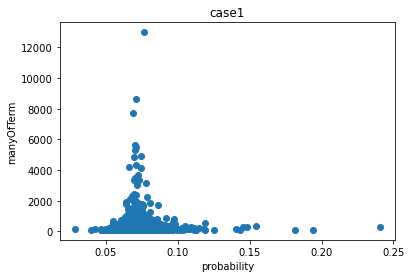

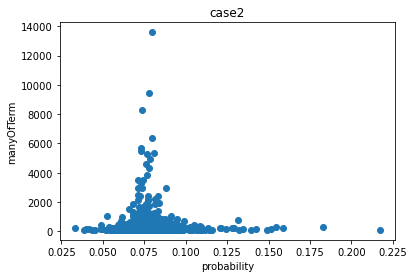

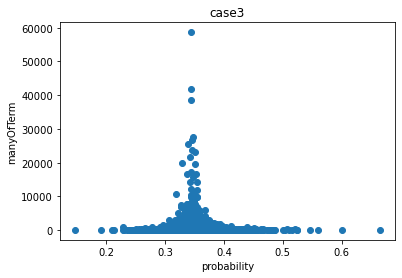

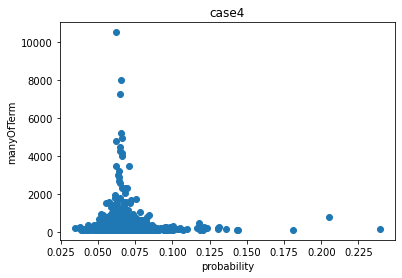

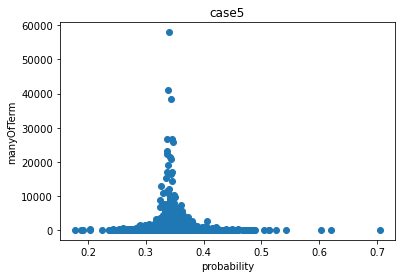

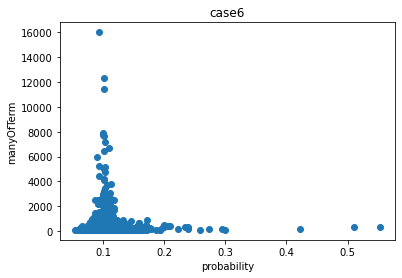

In [34]:
import matplotlib.pyplot as plt

for i in range(6):
    plt.scatter(df_list[i].iloc[0,:],df_list[i].iloc[1,:])
    plt.title(f'case{i+1}')
    plt.xlabel('probability')
    plt.ylabel('manyOfTerm')
    plt.show()

## case1
:평균보다 높게(a > avg인 a) 오른 뒤 더 큰 (b > a인 b)로 오른 경우

In [35]:
import numpy as np

In [36]:
df_list[0] = df_list[0].transpose()
df1 = df_list[0][df_list[0]['probability'] >= (case_per[0]*1.5)]
df_list[0] = df_list[0].transpose()

std_list = []
for c in df1.index:
    _valueList = weekly_df_cut_word_list[0].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
df1['std'] = std_list
df1

,probability,total,std
골프장,0.119275,125.0,6.852640
공공재,0.240385,275.0,21.141200
금호산업,0.111226,108.0,3.914818
롯데월드,0.115014,203.0,10.193389
리비아,0.193811,119.0,12.883326
밋,0.108491,161.0,6.669651
반도유,0.112486,100.0,4.084424
법,0.118934,549.0,25.174711
병원,0.118683,155.0,5.230507
부총리,0.140727,151.0,10.886467


In [37]:
weekly_df_cut_word_list[0].loc[:,df1.index]

,골프장,공공재,금호산업,롯데월드,리비아,밋,반도유,법,병원,부총리,서울숲,실시간,용적,은평뉴타운,임대차,장학금,킨텍스,홍남기,후보지
6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,66.0,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN,1.0,3.0,NaN,1.0,NaN,NaN,NaN
34,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
36,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,NaN,1.0,35.0,NaN,NaN,1.0,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,2.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN
47,1.0,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,13.0,NaN,NaN,8.0,1.0,NaN,NaN,NaN,NaN,1.0
66,3.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,26.0,NaN,3.0,1.0,NaN,1.0,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0,1.0,5.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN


## case2
:평균보다 높게(a > avg인 a) 오른 뒤 더 적게 (a > b > avg인 b) 오른 경우

In [38]:
df_list[1] = df_list[1].transpose()
df2 = df_list[1][df_list[1]['probability'] >= (case_per[1]*1.5)]
df_list[1] = df_list[1].transpose()

std_list = []
for c in df2.index:
    _valueList = weekly_df_cut_word_list[1].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
df2['std'] = std_list
df2

,probability,total,std
가점,0.154749,290.0,10.033095
건교부,0.149289,126.0,4.047922
법정,0.142184,181.0,7.313977
성금,0.139303,112.0,7.198421
원가,0.182951,279.0,15.857123
은평,0.124555,140.0,4.065804
은평뉴타운,0.127803,228.0,9.035589
총회,0.134632,152.0,7.499434
쿠웨이트,0.132296,102.0,6.093170
토건,0.129149,214.0,8.794042


In [39]:
weekly_df_cut_word_list[1].loc[:,df2.index]

,가점,건교부,법정,성금,원가,은평,은평뉴타운,총회,쿠웨이트,토건,파업,페어,평,하우징
5,3.0,8.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,66.0,NaN
14,NaN,7.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,41.0,NaN
22,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,20.0,NaN
26,1.0,4.0,1.0,NaN,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,31.0,NaN
35,NaN,9.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,4.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,1.0
760,NaN,NaN,1.0,NaN,11.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,6.0,NaN
762,4.0,NaN,1.0,57.0,NaN,1.0,NaN,1.0,NaN,18.0,NaN,NaN,8.0,NaN
769,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN


## case3
:평균보다 높게(a > avg인 a) 오른 뒤 평균보다 적게 (avg > b인 b) 오른 경우

In [40]:
df_list[2] = df_list[2].transpose()
df3 = df_list[2][df_list[2]['probability'] >= (case_per[2]*1.5)]
df_list[2] = df_list[2].transpose()

std_list = []
for c in df3.index:
    _valueList = weekly_df_cut_word_list[2].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
df3['std'] = std_list
df3

,probability,total,std
겸용,0.546624,170.0,2.156520
내진,0.520270,308.0,4.360584
브루나이,0.664596,107.0,2.506259
수령,0.524390,129.0,2.238902
운하,0.515942,178.0,4.071536
재건,0.559406,113.0,1.542804
제회,0.524510,107.0,1.133566
창릉,0.600000,213.0,7.367255


In [41]:
weekly_df_cut_word_list[2].loc[:,df3.index]

,겸용,내진,브루나이,수령,운하,재건,제회,창릉
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## case4
:평균보다 적게(avg >a인 a) 오른 뒤 더 크게 (avg > b > a인 b) 오른 경우

In [42]:
df_list[3] = df_list[3].transpose()
df4 = df_list[3][df_list[3]['probability'] >= (case_per[3]*1.5)]
df_list[3] = df_list[3].transpose()

std_list = []
for c in df4.index:
    _valueList = weekly_df_cut_word_list[3].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
df4['std'] = std_list
df4

,probability,total,std
거주,0.121257,247.0,8.012957
공시지가,0.130947,278.0,28.817052
공항,0.117804,485.0,27.226411
과세,0.123197,205.0,6.950565
김해,0.130618,186.0,16.042382
당정,0.143437,106.0,5.415899
라,0.104042,139.0,7.933991
버스,0.109944,157.0,8.888754
보상금,0.143705,121.0,5.080592
부실,0.104651,144.0,3.766323


In [43]:
weekly_df_cut_word_list[3].loc[:,df4.index]

,거주,공시지가,공항,과세,김해,당정,라,버스,보상금,부실,...,연립,예,요건,원가,종부,직방,파업,표준지,합의,확장
12,NaN,1.0,2.0,4.0,1.0,19.0,NaN,NaN,1.0,NaN,...,NaN,NaN,6.0,3.0,NaN,NaN,NaN,NaN,3.0,12.0
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,...,1.0,NaN,NaN,5.0,3.0,NaN,2.0,NaN,NaN,NaN
44,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,4.0,1.0,...,2.0,NaN,1.0,18.0,2.0,NaN,NaN,NaN,NaN,1.0
49,NaN,NaN,1.0,4.0,NaN,26.0,NaN,NaN,32.0,1.0,...,1.0,5.0,NaN,5.0,47.0,NaN,NaN,NaN,5.0,6.0
53,1.0,NaN,1.0,NaN,NaN,19.0,NaN,NaN,7.0,NaN,...,4.0,4.0,NaN,119.0,2.0,NaN,NaN,NaN,3.0,1.0
70,NaN,1.0,NaN,4.0,4.0,NaN,NaN,1.0,NaN,1.0,...,1.0,NaN,2.0,2.0,24.0,NaN,NaN,NaN,1.0,NaN
76,NaN,NaN,2.0,2.0,1.0,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
90,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0
103,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,...,7.0,NaN,NaN,1.0,30.0,NaN,NaN,NaN,NaN,2.0
113,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,9.0,NaN,...,15.0,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,1.0


## case5
:평균보다 적게(avg >a인 a) 오른 뒤 더 평균보다 크게 (b > avg인 b) 오른 경우

In [44]:
df_list[4] = df_list[4].transpose()
df5 = df_list[4][df_list[4]['probability'] >= (case_per[4]*1.5)]
df_list[4] = df_list[4].transpose()

std_list = []
for c in df5.index:
    _valueList = weekly_df_cut_word_list[4].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
df5['std'] = std_list
df5

,probability,total,std
김동연,0.704453,174.0,6.772110
산불,0.621145,141.0,6.153995
스케이프,0.602740,176.0,6.492334
신진,0.513889,111.0,1.627264
이재민,0.543210,132.0,4.436477
착공식,0.525806,163.0,3.611288
하버,0.512821,140.0,1.976891


In [45]:
weekly_df_cut_word_list[4].loc[:,df5.index]

,김동연,산불,스케이프,신진,이재민,착공식,하버
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,1.0,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
794,NaN,NaN,NaN,NaN,NaN,NaN,1.0
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## case6
:평균보다 적게(avg >a인 a) 오른 뒤 더 적게 (a > b인 b) 오른 경우

In [46]:
df_list[5] = df_list[5].transpose()
df6 = df_list[5][df_list[5]['probability'] >= (case_per[5]*1.5)]
df_list[5] = df_list[5].transpose()

std_list = []
for c in df6.index:
    _valueList = weekly_df_cut_word_list[5].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
df6['std'] = std_list
df6

,probability,total,std
大賞,0.223301,138.0,9.313518
文,0.199194,346.0,10.982025
가상,0.156195,445.0,20.913196
갱신,0.194004,110.0,5.333580
공공재,0.195804,224.0,15.208263
...,...,...,...
현실,0.148129,285.0,8.407608
호매실,0.159772,112.0,4.008292
홍남기,0.205987,406.0,16.809917
화학,0.294624,137.0,5.472978


In [47]:
weekly_df_cut_word_list[5].loc[:,df6.index]

,大賞,文,가상,갱신,공공재,공구,공시,공포,광풍,그래픽,...,품귀,플래티넘,항공기,허가제,현금,현실,호매실,홍남기,화학,흑석
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
11,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,2.0,5.0,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,3.0,27.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,1.0,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,NaN,14.0,8.0,2.0,28.0,NaN,NaN,NaN,4.0,2.0,...,11.0,NaN,NaN,1.0,48.0,13.0,NaN,38.0,NaN,2.0
797,NaN,13.0,NaN,4.0,16.0,NaN,72.0,NaN,NaN,10.0,...,NaN,NaN,NaN,10.0,2.0,7.0,NaN,12.0,5.0,8.0
800,NaN,12.0,2.0,1.0,2.0,NaN,24.0,NaN,4.0,8.0,...,NaN,NaN,NaN,3.0,2.0,5.0,NaN,48.0,NaN,NaN
805,NaN,26.0,NaN,1.0,2.0,1.0,4.0,1.0,5.0,13.0,...,NaN,2.0,NaN,3.0,8.0,10.0,NaN,4.0,NaN,NaN


## Case3, 5
: 등장확률이 0.3%를 넘고 10000번 이상 등장한 단어

## case3
:평균보다 높게(a > avg인 a) 오른 뒤 평균보다 적게 (avg > b인 b) 오른 경우

In [48]:
print("Case3")
df_list[2] = df_list[2].transpose()
_df3 = df_list[2][df_list[2]['total'] >= 10000]
df_list[2] = df_list[2].transpose()

std_list = []
for c in _df3.index:
    _valueList = weekly_df_cut_word_list[2].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
_df3['std'] = std_list
_df3

Case3


,probability,total,std
가구,0.351094,19709.0,29.450043
강남,0.344776,10295.0,21.303660
개발,0.347778,15786.0,27.254504
건설,0.345725,26839.0,47.618109
공급,0.353983,14245.0,42.185219
년,0.336833,16522.0,33.600771
도시,0.351099,23274.0,53.762505
등,0.348597,11023.0,19.406379
만,0.347270,27633.0,46.641639
부동산,0.338743,25401.0,47.982190


## case5
:평균보다 적게(avg >a인 a) 오른 뒤 더 평균보다 크게 (b > avg인 b) 오른 경우

In [49]:
print("Case5")
df_list[4] = df_list[4].transpose()
_df5 = df_list[4][df_list[4]['total'] >= 10000]
df_list[4] = df_list[4].transpose()

std_list = []
for c in _df5.index:
    _valueList = weekly_df_cut_word_list[4].loc[:,c]
    _valueList = _valueList.fillna(0)
    std_list.append(np.std(_valueList[:-1]))
_df5['std'] = std_list
_df5

Case5


,probability,total,std
가구,0.339158,19039.0,27.036077
강남,0.348459,10405.0,23.276335
개발,0.334075,15164.0,29.498812
건설,0.345764,26842.0,51.173558
공급,0.325406,13095.0,27.078667
년,0.344886,16917.0,33.996507
도시,0.335983,22272.0,43.270354
등,0.340249,10759.0,19.686987
만,0.335822,26722.0,43.457606
부동산,0.346451,25979.0,63.344153
